In [1]:
from accelerator import Lattice
from accelerator.elements import Dipole
from accelerator.elements import Drift
from accelerator.elements import QuadrupoleThin
from accelerator import Beam
from accelerator.utils import to_twiss, to_phase_coord
# from itertools import chain

import matplotlib.pyplot as plt

import numpy as np

# FODO cell

In [2]:
drift_l = 5  # m
focal_length = 10  # meters

FODO_cell = [QuadrupoleThin(focal_length*2),
             Drift(drift_l),
             QuadrupoleThin(-focal_length),
             Drift(drift_l),
             QuadrupoleThin(focal_length*2)]
fodo = Lattice(FODO_cell)
fodo

Lattice([QuadrupoleThin(f=20, name='quadrupole_thin_0'), Drift(l=5, name='drift_0'), QuadrupoleThin(f=-10, name='quadrupole_thin_1'), Drift(l=5, name='drift_1'), QuadrupoleThin(f=20, name='quadrupole_thin_2')])

Oneturn transfer matrix

In [3]:
fodo.m

TransferMatrix([[ 0.875  , 12.5    ,  0.     ,  0.     ,  0.     ],
                [-0.01875,  0.875  ,  0.     ,  0.     ,  0.     ],
                [ 0.     ,  0.     ,  0.875  ,  7.5    ,  0.     ],
                [ 0.     ,  0.     , -0.03125,  0.875  ,  0.     ],
                [ 0.     ,  0.     ,  0.     ,  0.     ,  1.     ]])

twiss transfer matrix

In [4]:
fodo.m.twiss(plane='h')

array([[ 7.656250e-01, -2.187500e+01,  1.562500e+02],
       [ 1.640625e-02,  5.312500e-01, -1.093750e+01],
       [ 3.515625e-04,  3.281250e-02,  7.656250e-01]])

In [5]:
fodo.m.twiss(plane='v')

array([[ 7.656250e-01, -1.312500e+01,  5.625000e+01],
       [ 2.734375e-02,  5.312500e-01, -6.562500e+00],
       [ 9.765625e-04,  5.468750e-02,  7.656250e-01]])

Symplectic check.

$det(M_{one\_turn}) ==1$

In [6]:
np.linalg.det(fodo.m[:2, :2])

1.0

Stability check:

$|trace(M_{one turn})| < 2$

In [7]:
np.trace(fodo.m[:2, :2])

1.75

Periodic twiss solution:

In [8]:
twiss_sol = fodo.solve_twiss()
twiss_sol

array([[25.81988897],
       [ 0.        ],
       [ 0.03872983]])

Let's check

In [9]:
np.allclose(twiss_sol, fodo.m.twiss() @ twiss_sol)

True

### initial phase space shape

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x [m]', ylabel="x'">)

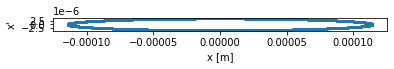

In [10]:
beam = Beam()
ellipse = beam.ellipse(twiss_sol)
ellipse.plot('h')

In [11]:
# ellipse is just a fancy tuple
print(ellipse.x.shape)
print(ellipse.x_prime.shape)
print(ellipse.y.shape)
print(ellipse.y_prime.shape)
print(ellipse.dp.shape)

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


# slicing an element

In [12]:
fodo.slice(Drift, 5)

Lattice([QuadrupoleThin(f=20, name='quadrupole_thin_0'), Drift(l=1.0, name='drift_0_slice_0'), Drift(l=1.0, name='drift_0_slice_1'), Drift(l=1.0, name='drift_0_slice_2'), Drift(l=1.0, name='drift_0_slice_3'), Drift(l=1.0, name='drift_0_slice_4'), QuadrupoleThin(f=-10, name='quadrupole_thin_1'), Drift(l=1.0, name='drift_1_slice_0'), Drift(l=1.0, name='drift_1_slice_1'), Drift(l=1.0, name='drift_1_slice_2'), Drift(l=1.0, name='drift_1_slice_3'), Drift(l=1.0, name='drift_1_slice_4'), QuadrupoleThin(f=20, name='quadrupole_thin_2')])

### twiss parameters along the FODO

In [13]:
twiss = fodo.slice(Drift, 5).twiss()

In [14]:
# twiss is just a fancy tuple
print(twiss.beta)
print(twiss.alpha)
print(twiss.gamma)
print(twiss.s)

[25.81988897 25.81988897 23.34117963 21.0690294  19.00343829 17.14440628
 15.49193338 15.49193338 17.14440628 19.00343829 21.0690294  23.34117963
 25.81988897 25.81988897]
[-1.14663341e-16  1.29099445e+00  1.18771489e+00  1.08443534e+00
  9.81155781e-01  8.77876225e-01  7.74596669e-01 -7.74596669e-01
 -8.77876225e-01 -9.81155781e-01 -1.08443534e+00 -1.18771489e+00
 -1.29099445e+00 -4.44089210e-16]
[0.03872983 0.10327956 0.10327956 0.10327956 0.10327956 0.10327956
 0.10327956 0.10327956 0.10327956 0.10327956 0.10327956 0.10327956
 0.10327956 0.03872983]
[ 0.  0.  1.  2.  3.  4.  5.  5.  6.  7.  8.  9. 10. 10.]


We can check twiss periodicity

In [15]:
np.allclose(twiss.beta[0], twiss.beta[-1])

True

In [16]:
np.allclose(twiss.alpha[0], twiss.alpha[-1])

True

In [17]:
np.allclose(twiss.gamma[0], twiss.gamma[-1])

True

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

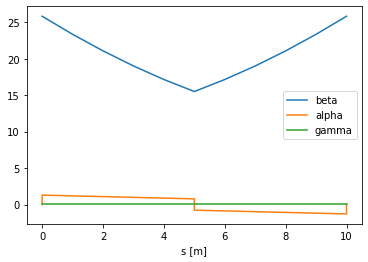

In [18]:
twiss.plot()

# transporting a particle

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

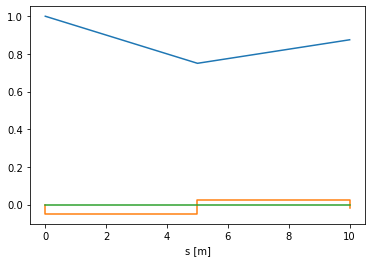

In [19]:
tracked = fodo.transport([1, 0, 0, 0, 0])  # phase space coords [x, x_prime, y, y_prime, dp/p]
tracked.plot('h')
# tracked is just a fancy tuple

In [20]:
# tracked is just a fancy tuple
print(tracked.x)
print(tracked.x_prime)
print(tracked.y)
print(tracked.y_prime)
print(tracked.dp)

[1.    1.    0.75  0.75  0.875 0.875]
[ 0.      -0.05    -0.05     0.025    0.025   -0.01875]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


# basic ring

In [21]:
n_fodo = 8
n_dipole = n_fodo # one dipole after each fodo
curve_perimeter = 120  # m
dip_theta = 2 * np.pi / n_dipole
dip_rho = curve_perimeter / (n_dipole * dip_theta)
drift_l = 10

In [22]:
dip = Dipole(dip_rho, dip_theta)

In [23]:
sequence = (FODO_cell + [dip, Drift(drift_l)]) * n_fodo
lattice = Lattice(sequence)

In [24]:
lattice.m

TransferMatrix([[ 9.98210340e-01, -5.70462198e+00,  0.00000000e+00,
                  0.00000000e+00,  5.94171661e-01],
                [ 1.17238023e-02,  9.34793102e-01,  0.00000000e+00,
                  0.00000000e+00, -1.53420200e-01],
                [ 0.00000000e+00,  0.00000000e+00, -9.69540012e-01,
                  2.63764890e+01,  0.00000000e+00],
                [ 0.00000000e+00,  0.00000000e+00, -2.80600947e-02,
                 -2.68037646e-01,  0.00000000e+00],
                [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                  0.00000000e+00,  1.00000000e+00]])

Stability condition:

In [25]:
np.trace(lattice.m[:2, :2])

1.9330034413710098

### Lattice layout

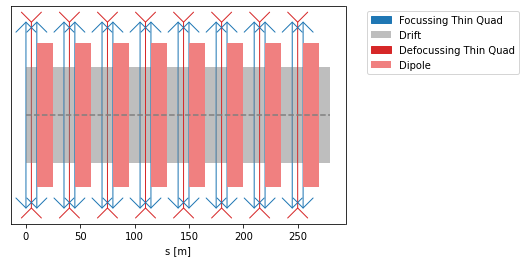

In [26]:
lattice.plot();

### Lattice overview

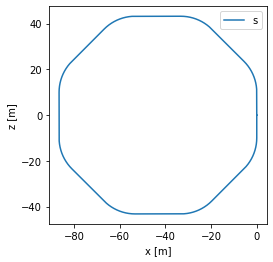

In [27]:
lattice.plot.top_down();

### Phasespace coords: transporting a particle

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

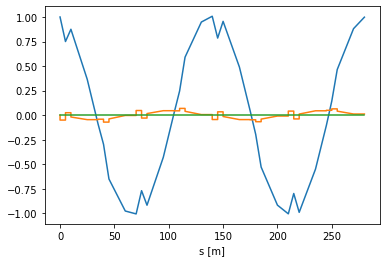

In [28]:
tranported = lattice.transport([1, 0, 0, 0, 0])
tranported.plot('h')

### Twiss parameters

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

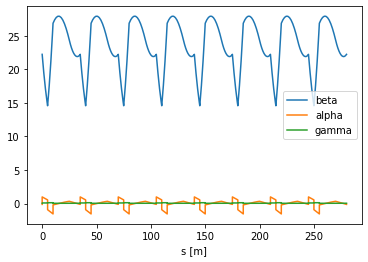

In [29]:
twiss = lattice.slice(Dipole, 10).slice(Drift, 10).twiss()
twiss.plot()

### dispersion function

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='s [m]'>, <AxesSubplot:xlabel='s [m]'>],
       dtype=object))

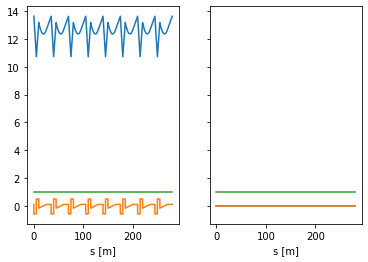

In [30]:
tranported = lattice.slice(Dipole, 10).slice(Drift, 10).dispersion()
tranported.plot()

### Phasespace ellipses

In [37]:
beam = Beam(n_particles=10)

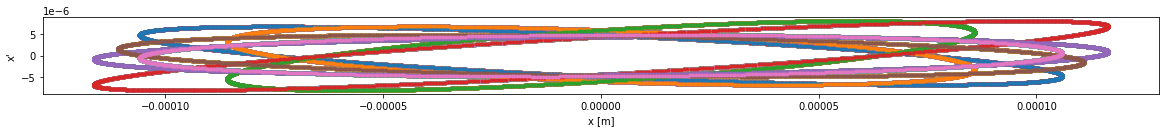

In [36]:
ellipses = lattice.transport(beam.ellipse(lattice.solve_twiss()))
fig, ax = ellipses.plot('h')
fig.set_size_inches((20, 20))

### particle trajectories

In [38]:
particles = lattice.slice(Drift, 100)\
                       .slice(Dipole, 100)\
                       .transport(beam.match(lattice.solve_twiss()))

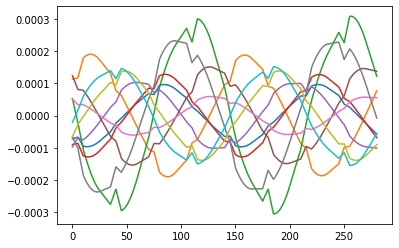

In [41]:
plt.plot(particles.s, particles.x.T);

# Now an unstable lattice

In [42]:
n_fodo = 8
n_dipole = n_fodo # one dipole after each fodo
curve_perimeter = 12  # m
dip_theta = 2 * np.pi / n_dipole
dip_rho = curve_perimeter / (n_dipole * dip_theta)
drift_l = 10

In [43]:
dip = Dipole(dip_rho, dip_theta)

In [44]:
sequence = (FODO_cell + [dip, Drift(drift_l)]) * n_fodo
lattice = Lattice(sequence)

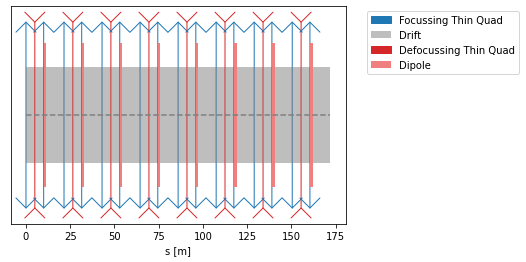

In [45]:
lattice.plot();

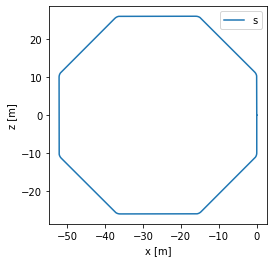

In [46]:
lattice.plot.top_down();

In [48]:
np.trace(lattice.m[:2, :2])

3766948.991607668

# tranporting a particle

In [51]:
particles = lattice.transport([1, 0, 0, 0, 0])

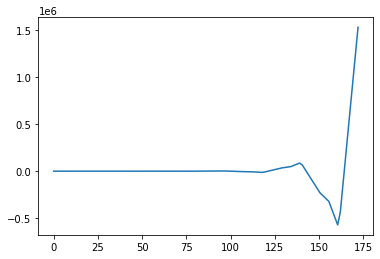

In [52]:
plt.plot(particles.s, particles.x);

# figure of 8 ring

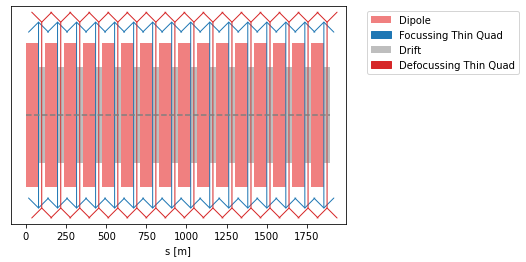

In [53]:
focal_length = 100
drift_l = 20
FODO_cell = [QuadrupoleThin(focal_length), Drift(drift_l), QuadrupoleThin(-focal_length), Drift(drift_l)]

wing_1 = ([Dipole(100, np.pi/4)] + FODO_cell) * 8
wing_2 = ([Dipole(-100, -np.pi/4)] + FODO_cell) * 8

lattice = Lattice(wing_1 + wing_2)
fig, ax = lattice.plot()
# leg = ax.legend()
# leg.get_label()

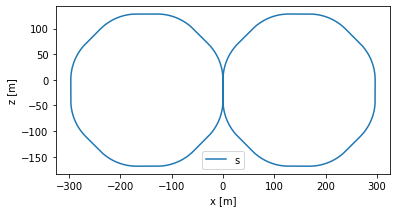

In [54]:
lattice.plot.top_down();

In [56]:
lattice.solve_twiss()

array([[ 9.59416852e+01],
       [-2.71834775e-01],
       [ 1.11931966e-02]])

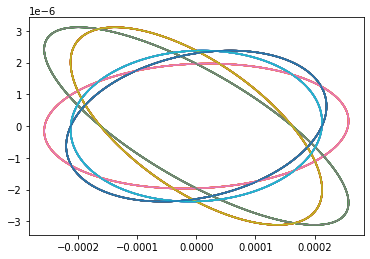

In [57]:
ellipses = lattice.transport(phasespace=beam.ellipse(lattice.solve_twiss()))
plt.plot(ellipses.x, ellipses.x_prime);

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

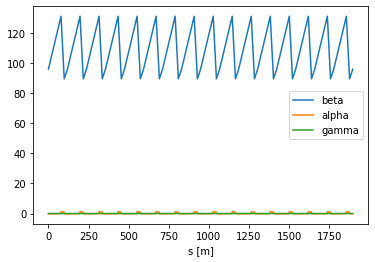

In [58]:
lattice.twiss().plot()